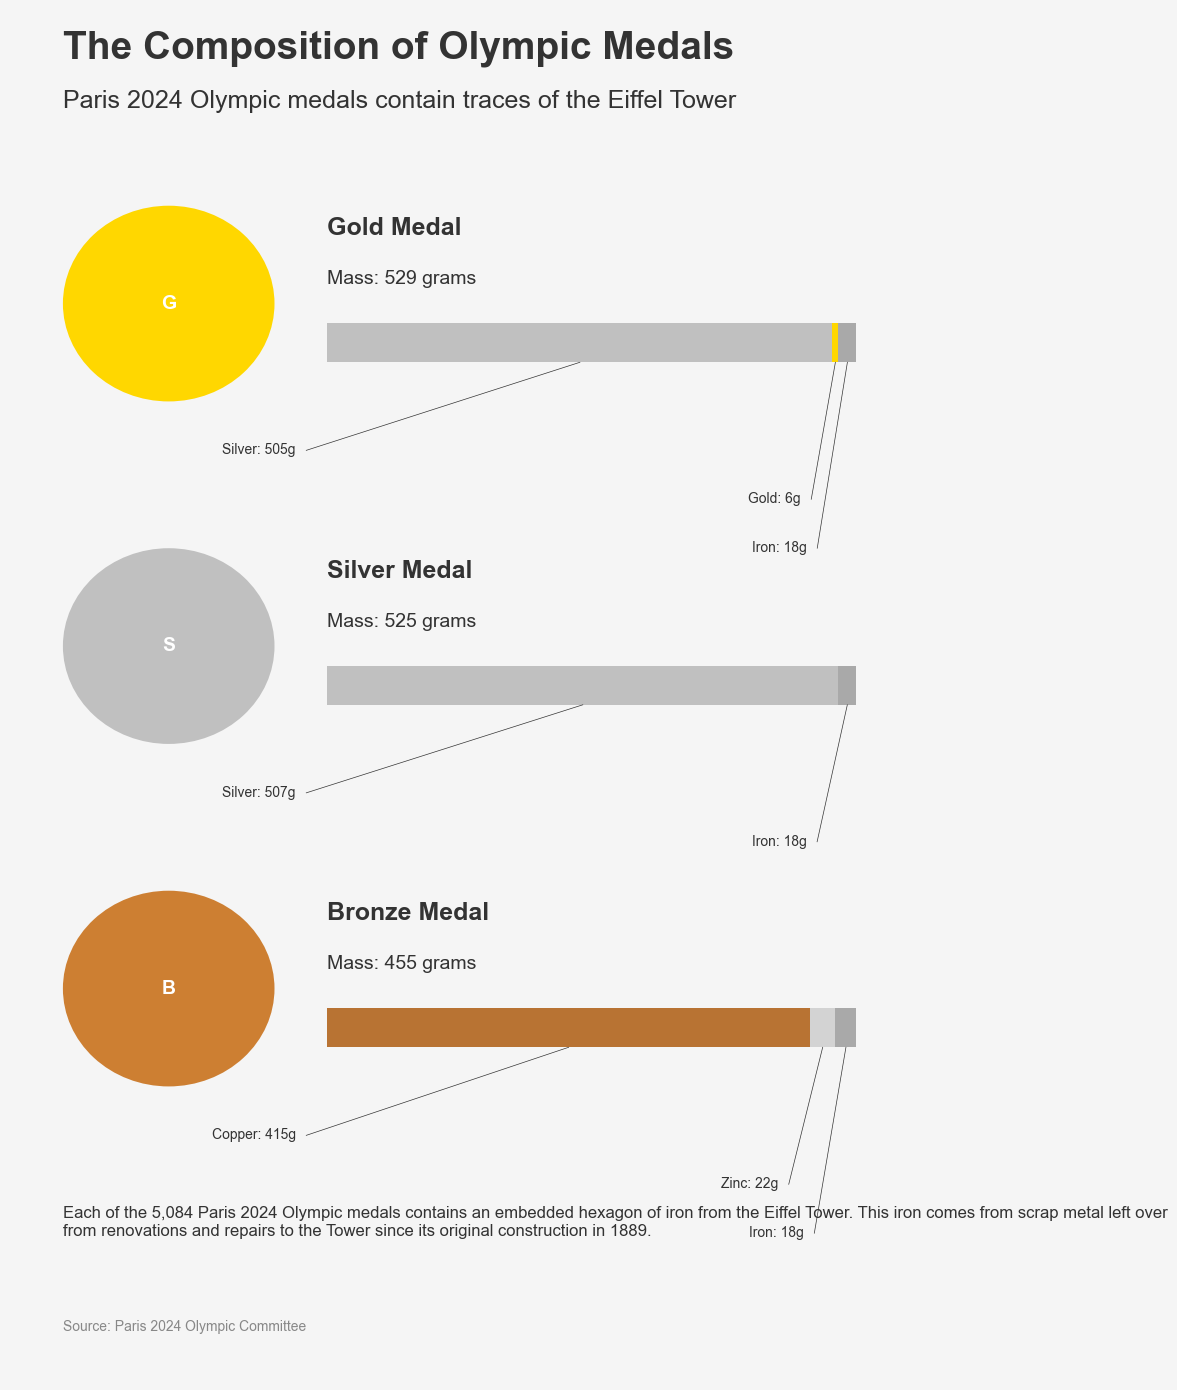

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams

# Set up the plot style to mimic Figma
plt.style.use('default')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Define data
medal_data = {
    'Gold': {'Mass': 529, 'Silver': 505, 'Gold': 6, 'Iron': 18},
    'Silver': {'Mass': 525, 'Silver': 507, 'Iron': 18},
    'Bronze': {'Mass': 455, 'Copper': 415, 'Zinc': 22, 'Iron': 18}
}

# Define modern, muted colors
colors = {
    'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32',
    'Iron': '#A9A9A9', 'Copper': '#B87333', 'Zinc': '#D3D3D3',
    'Background': '#F5F5F5', 'Text': '#333333'
}

# Create the figure
fig, ax = plt.subplots(figsize=(12, 14), facecolor=colors['Background'])
ax.set_facecolor(colors['Background'])

# Set up the layout
ax.set_xlim(0, 100)
ax.set_ylim(0, 140)
ax.axis('off')

# Add title and subtitle
ax.text(5, 135, 'The Composition of Olympic Medals', fontsize=28, fontweight='bold', color=colors['Text'])
ax.text(5, 130, 'Paris 2024 Olympic medals contain traces of the Eiffel Tower', fontsize=18, color=colors['Text'])

# Function to create a medal diagram
def create_medal_diagram(y_pos, medal_type):
    # Medal circle
    circle = plt.Circle((15, y_pos), 10, facecolor=colors[medal_type], edgecolor='none')
    ax.add_artist(circle)
    ax.text(15, y_pos, medal_type[0], ha='center', va='center', fontweight='bold', fontsize=14, color='white')
    
    # Medal data
    ax.text(30, y_pos+7, f"{medal_type} Medal", fontsize=18, fontweight='bold', color=colors['Text'])
    ax.text(30, y_pos+2, f"Mass: {medal_data[medal_type]['Mass']} grams", fontsize=14, color=colors['Text'])
    
    # Composition bars
    start_x = 30
    total_composition = sum(amount for material, amount in medal_data[medal_type].items() if material != 'Mass')
    for i, (material, amount) in enumerate(medal_data[medal_type].items()):
        if material != 'Mass':
            width = (amount / total_composition) * 50  # Scale to fit within 50 units
            rect = patches.Rectangle((start_x, y_pos-6), width, 4, facecolor=colors.get(material, 'gray'), edgecolor='none')
            ax.add_patch(rect)
            
            # Calculate position for label
            label_y = y_pos - 10 - (i * 5)
            
            # Draw straight leader line
            ax.plot([start_x + width/2, start_x - 2], 
                    [y_pos-6, label_y], 
                    color=colors['Text'], linewidth=0.5)
            
            # Add label
            ax.text(start_x - 3, label_y, f"{material}: {amount}g", 
                    ha='right', va='center', fontsize=10, color=colors['Text'])
            
            start_x += width

# Create medal diagrams
create_medal_diagram(110, 'Gold')
create_medal_diagram(75, 'Silver')
create_medal_diagram(40, 'Bronze')

# Add footer
footer_text = ('Each of the 5,084 Paris 2024 Olympic medals contains an embedded hexagon of iron from the Eiffel Tower. '
               'This iron comes from scrap metal left over from renovations and repairs to the Tower since its original construction in 1889.')
ax.text(5, 15, footer_text, fontsize=12, ha='left', wrap=True, color=colors['Text'])

# Add source and credit
ax.text(5, 5, 'Source: Paris 2024 Olympic Committee', fontsize=10, color='#888888')

# Add a subtle grid
ax.grid(True, linestyle='--', alpha=0.3, color='#CCCCCC')

plt.tight_layout()
plt.show()

In [ ]:
# Save the figure
plt.savefig('OlympicsMedal.png', dpi=300)
plt.savefig('OlympicsMedal.svg', format='svg', dpi=300, bbox_inches='tight')
